In [31]:
from IPython.display import display
import warnings
warnings.filterwarnings(action='ignore')

#실습용 데이터 패키지
from sklearn.datasets import load_breast_cancer, load_boston

#데이터 전처리
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler

#기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm 
from sklearn.model_selection import KFold

#시각화 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

#한글 폰트 설정
plt.rc('font', family= 'Malgun Gothic')



In [143]:
#데이터셋 로드 및 설명
data = pd.read_csv('galariarf.csv')
data2 = pd.read_csv('galariatarget.csv')
data2

,netprofit,ordernum,disposenum
0,566085,117.000000,99.000000
1,726360,158.000000,106.000000
2,732362,138.000000,98.000000
3,705722,140.000000,131.000000
4,658637,149.000000,109.000000
...,...,...,...
143,546217,105.759036,85.463415
144,546217,105.759036,85.463415
145,546217,105.759036,85.463415
146,546217,105.759036,85.463415


In [169]:
X = pd.DataFrame(data, columns=['day','hightemp','avgrain','avgwind'])
y = pd.DataFrame(data2, columns=['disposenum'])

In [170]:
X.head(30)

,day,hightemp,avgrain,avgwind
0,43467,0.2,106,1.7
1,43468,3.2,98,1.4
2,43469,4.1,131,1.2
3,43470,1.1,109,2.2
4,43471,2.7,78,1.2
5,43472,3.1,104,1.4
6,43473,0.5,73,2.6
7,43474,1.3,87,1.3
8,43475,3.0,101,1.3
9,43476,7.2,93,1.0


In [171]:
X.tail()

,day,hightemp,avgrain,avgwind
143,43612,22.3,0,2.4
144,43613,24.6,0,2.6
145,43614,26.5,0,2.0
146,43615,24.5,0,2.4
147,43616,23.3,0,2.8


In [172]:
y.tail()

,disposenum
143,85.463415
144,85.463415
145,85.463415
146,85.463415
147,85.463415


In [173]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   disposenum  148 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB


In [174]:
X.describe()

,day,hightemp,avgrain,avgwind
count,148.000000,148.000000,148.000000,148.000000
mean,43542.040541,13.468919,45.797297,1.943243
std,43.486940,8.709865,45.656356,0.566186
min,43467.000000,-1.900000,0.000000,0.900000
25%,43505.750000,6.450000,0.000000,1.500000
50%,43542.500000,12.950000,53.500000,1.900000
75%,43579.250000,20.200000,88.500000,2.300000
max,43616.000000,33.400000,147.000000,3.500000


In [175]:
y['netprofit'].value_counts()

KeyError: 'netprofit'

In [176]:
#Train/Test 데이터 분리
# Training 데이터 70%/ Testing 데이터 30% 나누기 

#Train set/ Test set 나누기 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.439, random_state=2021)

#데이터 컬럼 단위 정규화 하기 
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (83, 4)
Test set dimension is (65, 4)


In [177]:
#모델링 (하이퍼파라미터 결정)

#4.1 단순 모델링(사용자가 하이퍼 파라미터 정의)

rfc = RandomForestClassifier(n_estimators=10,random_state=2021)
rfc.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [178]:
#Train set에 대한 성능 
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f"정확도:{acc:0.4f}")

#Test set에 대한 성능 
y_pred = rfc.predict(X_test) 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("\n")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 61.46it/s]


IndexError: list index out of range

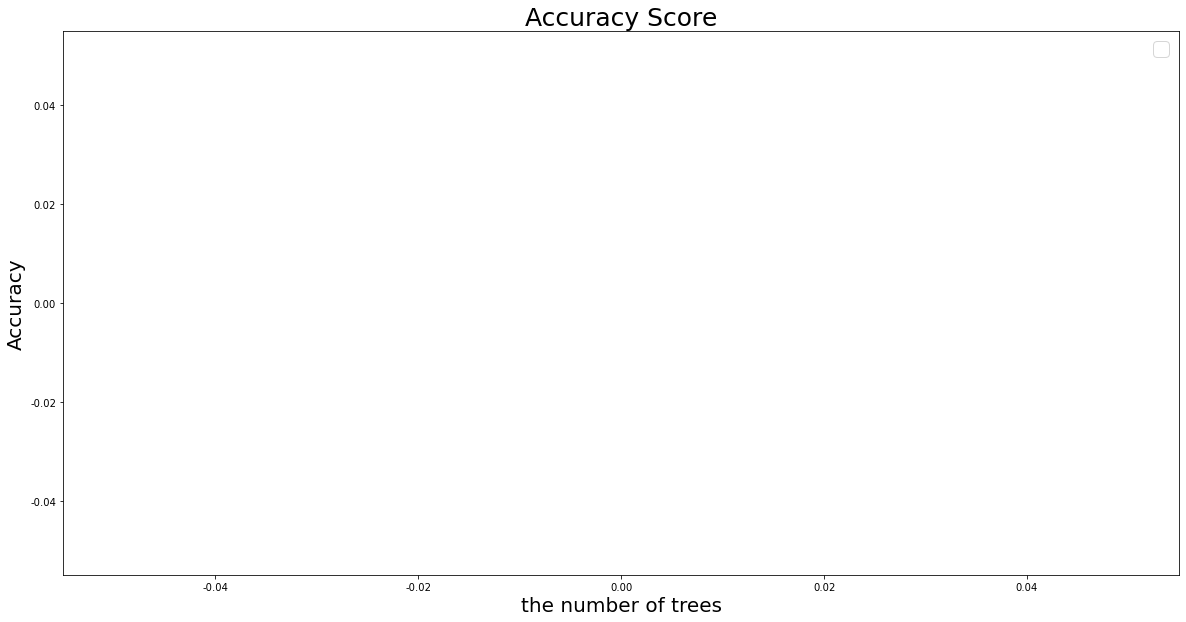

In [179]:
#단일 하이퍼 파라미터에 대한 Grid search 

cv_scores = []
estimator_list = [i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
  rfc = RandomForestClassifier(n_estimators=i+1,
                               n_jobs=-1,
                               random_state=2021
                              )
  score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
  cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)] 
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()


In [ ]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+1}")
print("\n")
print("Train set에 대한 성능 (10 fold cross validation)")
print(f"정확도:{max(cv_scores):0.4f}")

In [ ]:
rfc = RandomForestClassifier(n_estimators=37, n_jobs=-1, random_state=2021)
rfc.fit(X_train, y_train)

#Train set에 대한 성능 
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f"정확도:{acc:0.4f}")

#Test set에 대한 성능 
y_pred = rfc.predict(X_test) 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("\n")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")


In [ ]:
print("MSE :", mean_squared_error(y_test, y_pred))

In [ ]:
import pandas as pd 
import csv

rf_data=pd.DataFrame(y_pred)

rf_data


rf_data.to_csv('rfgalaria.csv', index=False)


In [ ]:
rfc = RandomForestClassifier(random_state=2021)
param_grid={
    'n_estimators':[50, 60, 70],
    'max_depth': [10,15,20],
    'max_leaf_nodes':[50, 100, 200],
    'criterion':['gini', 'entropy'],
    'max_features':['auto', 'sqrt', 'log2']
}

CV_rfc= GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1, n_jobs=12)
CV_rfc.fit(X_train, y_train)

In [ ]:
# 최적의 하이퍼 파라미터 셋 
CV_rfc.best_params_ 

In [180]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by='mean_test_score', ascending=False)
print(result_table[['params', 'mean_test_score']])

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [181]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [182]:
#Train set에 대한 성능 
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f"정확도:{acc:0.4f}")

#Test set에 대한 성능 
y_pred = best_rfc.predict(X_test) 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("\n")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [183]:
recall = recall_score(y_true = y_test, y_pred =y_pred, pos_label='positive', average='micro') ##민감도
precision = precision_score(y_true = y_test, y_pred =y_pred, pos_label='positive', average='micro') ##정밀도 

print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep=' | ')


ValueError: Found input variables with inconsistent numbers of samples: [65, 44]

In [184]:
plot_confusion_matrix(best_rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [185]:
features=X.columns.tolist()
feats = {}
for i in (len(feature)):
  feats[feature] = importance 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index':'Features'})
sns.set(font_scale = 5)
sns.set(style='whitegrid', color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight ='bold')
display(plt.show())
display(importances)

NameError: name 'feature' is not defined

In [186]:
# 4.4 타 알고리즘과의 비교 
#KNN 
classifier =KNeighborsClassifier(n_neighbors = 5, p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_true = y_test, y_pred =y_pred)##정확도 
recall = recall_score(y_true = y_test, y_pred=y_pred, pos_label='positive', average='micro')##민감도 
precision = precision_score(y_true = y_test, y_pred = y_pred, pos_label='positive', average='micro') ## 정밀도 

print('KNN')
print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep='  |  ')

ValueError: Unknown label type: 'continuous'

In [187]:
# Decision Tree 
classifier = DecisionTreeClassifier(random_state=1000)
param_grid = {
    'max_depth': [10,15,20],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['gini', 'entropy']
}

CV_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, verbose=1, n_jobs=12)
CV_classifier.fit(X_train, y_train) 

best_classifier = CV_classifier.best_estimator_
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)

acc = accuracy_score(y_true= y_test, y_pred =y_pred) ##정확도 
recall = recall_score(y_true = y_test, y_pred = y_pred, pos_label='positive'
                                           ,average='micro')## 민감도 
precision = precision_score(y_true = y_test, y_pred =y_pred, pos_label='positive'
                                           ,average='micro')##정밀도 

print('Decision Tree')
print(f"정확도:{acc:0.4f}", f"민감도:{recall:0.4f}", f"정밀도:{precision:0.4f}", sep='. |. ')

Fitting 10 folds for each of 18 candidates, totalling 180 fits


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 559, in _v

ValueError: Unknown label type: 'continuous'

In [188]:
'''
# Regression 예시 
boston = load_boston()

# 데이터 프레임 형태로 변환 
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.295, random_state=1000)

# Random Forest Regressor 
rfr = RandomForestRegressor(random_state=1000)
param_grid = {
    'max_depth': [10, 50, 100, 200],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['mae', 'mse']
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10, verbose=1, n_jobs=12, scoring='r2')
CV_rfr.fit(X_train, y_train)

best_rfr = CV_rfr.best_estimator_ 
best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)

r2score = r2_score(y_true = y_test, y_pred = y_pred) ##R-squared score 
mse = mean_squared_error(y_true = y_test, y_pred =y_pred) ## MSE (Mean Squared Error)
mae = mean_absolute_error(y_true = y_test, y_pred =y_pred) ## MAE (Mean Absolute Error)

print('Random Forest Regressor')
print(f"R2 score:{r2score:0.4f}", f"MSE{mse:0.4f}", f"MAE{mae:0.4f}", sep = '  |. ')

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 559, in _v

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 559, in _v

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 559, in _v

Random Forest Regressor
R2 score:0.1537  |. MSE162.5680  |. MAE8.2590


In [189]:
import pandas as pd 
import csv

lr_data=pd.DataFrame(y_pred)

lr_data


lr_data.to_csv('rfgalariadispose.csv', index=False)

In [190]:
#Decision Tree Regressor 
dtr = DecisionTreeRegressor(random_state=1000)
param_grid = {
    'max_depth': [10, 50, 100, 200],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['mae', 'mse']
}

CV_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=10, verbose=1, n_jobs=12, scoring='r2')
CV_dtr.fit(X_train, y_train)

best_dtr = CV_rfr.best_estimator_ 
best_dtr.fit(X_train, y_train)

y_pred = best_dtr.predict(X_test)

r2score = r2_score(y_true = y_test, y_pred = y_pred) ##R-squared score 
mse = mean_squared_error(y_true = y_test, y_pred =y_pred) ## MSE (Mean Squared Error)
mae = mean_absolute_error(y_true = y_test, y_pred =y_pred) ## MAE (Mean Absolute Error)

print('Decision Tree Regressor')
print(f"R2 score:{r2score:0.4f}", f"MSE{mse:0.4f}", f"MAE{mae:0.4f}", sep = '  |. ')

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Decision Tree Regressor
R2 score:0.1537  |. MSE162.5680  |. MAE8.2590


In [191]:
#regressor 활용 masan 데이터 분석
#cancer = load_breast_cancer()

#X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
#y = pd.DataFrame(breast_cancer.target, columns=['diagnosis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfr = RandomForestRegressor(random_state=1000)
param_grid = {
    'max_depth': [10, 50, 100, 200],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['mae', 'mse']
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10, verbose=1, n_jobs=12, scoring='r2')
CV_rfr.fit(X_train, y_train)

best_rfr = CV_rfr.best_estimator_ 
best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)

r2score = r2_score(y_true = y_test, y_pred = y_pred) ##R-squared score 
mse = mean_squared_error(y_true = y_test, y_pred =y_pred) ## MSE (Mean Squared Error)
mae = mean_absolute_error(y_true = y_test, y_pred =y_pred) ## MAE (Mean Absolute Error)

print('Random Forest Regressor')
print(f"R2 score:{r2score:0.4f}", f"MSE{mse:0.4f}", f"MAE{mae:0.4f}", sep = '  |. ')

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 559, in _v

Random Forest Regressor
R2 score:-0.0119  |. MSE390.7669  |. MAE12.2723


In [192]:
#Decision Tree Regressor 활용 masan 데이터 분석
dtr = DecisionTreeRegressor(random_state=2021)
param_grid = {
    'max_depth': [10, 50, 100, 200],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['mae', 'mse']
}

CV_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=10, verbose=1, n_jobs=12, scoring='r2')
CV_dtr.fit(X_train, y_train)

best_dtr = CV_rfr.best_estimator_ 
best_dtr.fit(X_train, y_train)

y_pred = best_dtr.predict(X_test)

r2score = r2_score(y_true = y_test, y_pred = y_pred) ##R-squared score 
mse = mean_squared_error(y_true = y_test, y_pred =y_pred) ## MSE (Mean Squared Error)
mae = mean_absolute_error(y_true = y_test, y_pred =y_pred) ## MAE (Mean Absolute Error)

print('Decision Tree Regressor')
print(f"R2 score:{r2score:0.4f}", f"MSE{mse:0.4f}", f"MAE{mae:0.4f}", sep = '  |. ')

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Decision Tree Regressor
R2 score:-0.0119  |. MSE390.7669  |. MAE12.2723


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarni

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 191, in fit
    check_classification_targets(y)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 559, in _v

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 559, in _v

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 191, in fit
    check_classification_targets(y)
  File "/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/

In [113]:
features=X.columns.tolist()